**Challenge 2**

**Group 1:** Zhao, Chunmei, Triet, and Mahmood

In [2]:
#define functions
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.pyplot import cm
import numpy as np
import random
from numba import jit
import time

#calculating birth death probs
@jit(nopython=True)
def probs(y,k,coeff):
    b = coeff * (y - np.power(y, 2) / (2 * k))
    d = coeff * np.power(y, 2) / (2 * k)
    return b,d

#applying markov chain
@jit(nopython=True)
def markov_chain(input,p1,p2):
    x = random.uniform(0, 1)
    if x <= p1:
        out_temp=1
    elif x <= p1+p2:
        out_temp=-1
    else:
        out_temp = 0
    return input+out_temp

#calculating the whole trajectory
@jit(nopython=True)
def trajectory(X0,t,K,coeff):
    X = np.zeros(t)
    X[0] = X0
    for i in range(t):
        b, d = probs(X[i],K,coeff)
        X[i+1]=markov_chain(X[i], b, d)
    return X

#calculating extinction time
@jit(nopython=True)
def extinction_time(current_pop,K,coeff):
    extime = 0
    while current_pop > 0:
        b, d = probs(current_pop,K,coeff)
        current_pop = markov_chain(current_pop,b,d)
        extime=extime+1
    return extime

#calculating analytical extinction time
@jit(nopython=True)
def analytical_extinction_time(r,K,initpop):
    N = 2*K
    pop = np.arange(0,N+1)
    b = r*(pop - np.power(pop,2)/N)
    d = r*np.power(pop,2)/N
    ex = 0
    for i in range(initpop):
        for j in range(i+2,N+1):
            ex = ex + 1/d[i+1] + np.prod(b[i+1:j])/np.prod(d[i+1:j+1])
    return ex

Running time is 0.449793 s


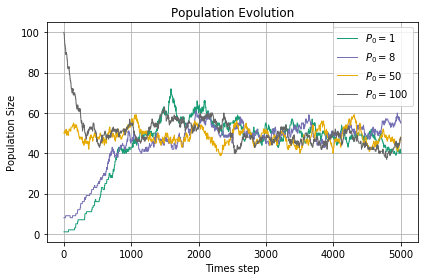

In [2]:
#part 1
#plot several trajectories
start = time.time()
r = 0.004
K = 50
t = 5000 #number of timesteps

X0 = [1,8,50,100]
fig1, ax1 = plt.subplots(1, 1)
color=iter(cm.Dark2(np.linspace(0,1,len(X0))))
for x0 in X0:
    X = trajectory(x0,t,K,r) #using markov chain for population evolution
    ax1.plot(np.arange(t), X, 'b', label='$P_{0} = %g$'%x0,color = next(color),linewidth=1) #plot the trajectories

end = time.time()
print("Running time is %g s"%(end-start))
plt.xlabel("Times step")
plt.ylabel("Population Size")
plt.title("Population Evolution")
plt.legend(loc="upper right")
plt.grid()
plt.tight_layout()
plt.show()

Running time is 0.923936 s


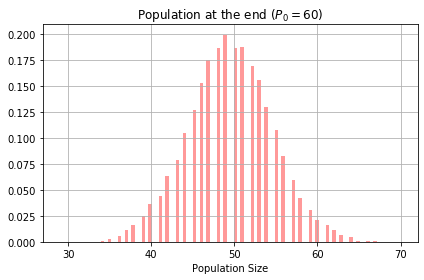

In [13]:
#plot final population histogram
start = time.time()
r = 0.004
K = 50
t = 5000
final_pop = []
num_X0 = 1
num_trials = 10000 #number of trials
for j in range(num_X0):
    X0 = 60
    for k in range(num_trials):
        X = trajectory(X0,t,K,r)
        final_pop.append(X[-1])

end = time.time()
print("Running time is %g s"%(end-start))
fig2, ax2 = plt.subplots(1, 1)
ax2.hist(final_pop,density=True,bins=100,alpha = 0.4,color = 'r',label='Histogram of Population at the end')
plt.xlabel("Population Size")
plt.title("Population at the end ($P_0 = %g$)"%X0)
plt.tight_layout()
plt.grid()
plt.show()

Running time is 0.931707 s


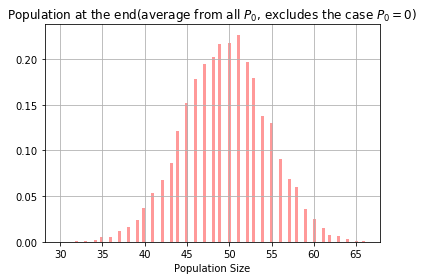

In [17]:
#plot final population histogram
start = time.time()
r = 0.004
K = 50
t = 5000
final_pop = []
num_X0 = K*2 #excludes 0 num of initpop from 1 to 16
num_trials = 100 #number of trials for each initial condition
for j in range(num_X0):
    X0 = j+1 #excludes 0
    for k in range(num_trials):
        X = trajectory(X0,t,K,r)
        final_pop.append(X[-1])

end = time.time()
print("Running time is %g s"%(end-start))
fig2, ax2 = plt.subplots(1, 1)
ax2.hist(final_pop,density=True,bins=100,alpha = 0.4,color = 'r',label='Histogram of Population at the end')
plt.xlabel("Population Size")
plt.title("Population at the end(average from all $P_0$, excludes the case $P_0 = 0$)")
plt.tight_layout()
plt.grid()
plt.show()

Running time is 0.0777059 s


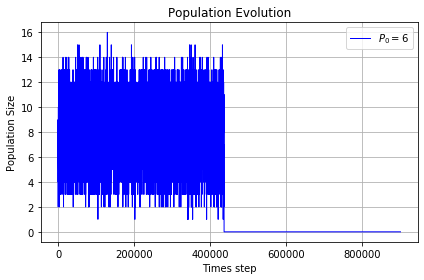

In [25]:
# part 2
#plot several trajectories
start = time.time()
r = 0.015
K = 8
t = 900000
X0 = [6]
fig1, ax1 = plt.subplots(1, 1)
color=iter(cm.rainbow(np.linspace(0,1,len(X0))))
for x0 in X0:
    X = trajectory(x0,t,K,r)
    ax1.plot(np.arange(t), X, 'b', label='$P_{0} = %g$'%x0,linewidth=1)

end = time.time()
print("Running time is %g s"%(end-start))
plt.xlabel("Times step")
plt.ylabel("Population Size")
plt.title("Population Evolution")
plt.legend(loc="upper right")
plt.grid()
plt.tight_layout()
plt.show()

Running time is 8.41075 s


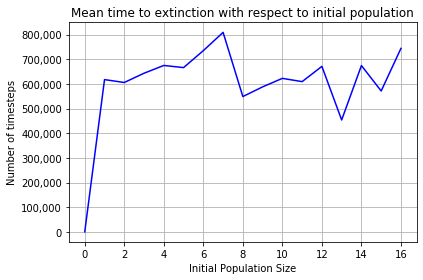

In [33]:
#plot the mean time the population reaches extinction, based on initial population
r = 0.015
K = 8
start = time.time()
num_X0 = K*2+1
num_trials = 50
X0 = []
final_pop = []
mean_time = []
for j in range(num_X0):
    n_time = []
    X0.append(j)
    for k in range(num_trials):
        i = extinction_time(j,K,r)
        n_time.append(max(i,0))
    mean_time.append(sum(n_time)/num_trials)
end = time.time()
print("Running time is %g s"%(end-start))
fig3, ax3 = plt.subplots(1, 1)
ax3.plot(X0, mean_time, 'b', label='Time to extinction wrt population')
plt.xlabel("Initial Population Size")
plt.ylabel("Number of timesteps")
plt.title("Mean time to extinction with respect to initial population")
plt.tight_layout()
ax3.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
plt.grid()
plt.show()

Running time is 8.15787 s


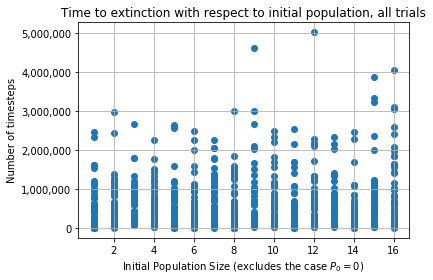

In [34]:
#plot the mean time the population reaches extinction, based on initial population
r = 0.015
K = 8
start = time.time()
num_X0 = K*2 #excludes 0
#num_X0 = K*2+1
num_trials = 50
X0 = []
final_pop = []
mean_time = []
for j in range(num_X0):
    n_time = []
    X0.append(j+1)#excludes 0
    #X0.append(j)
    for k in range(num_trials):
        i = extinction_time(j+1,K,r) #excludes 0
        #i = extinction_time(j,K,r)
        n_time.append(max(i,0))
    mean_time.append(n_time)
end = time.time()
print("Running time is %g s"%(end-start))
fig3, ax3 = plt.subplots(1, 1)

X = [X0[i] for i, data in enumerate(mean_time) for j in range(len(data))]
Y = [val for data in mean_time for val in data]

plt.scatter(X, Y)
plt.xlabel("Initial Population Size (excludes the case $P_0 = 0$)")
plt.ylabel("Number of timesteps")
plt.title("Time to extinction with respect to initial population, all trials")
plt.tight_layout()
plt.grid()
ax3.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
plt.show()

Running time is 2.52241 s


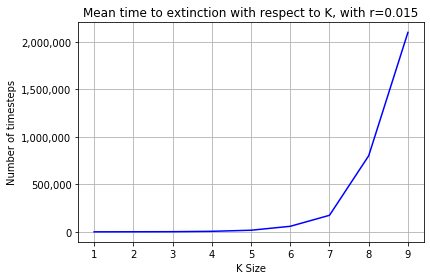

In [8]:
#plot the mean time the population reaches extinction, based on K
r = 0.015
num_K = 9
start = time.time()
num_trials = 50
X0 = []
final_pop = []
mean_time = []
for j in range(num_K):
    n_time = []
    X0.append(j+1)
    for k in range(num_trials):
        x0 = np.random.randint(1,2*j+2)
        i = extinction_time(x0,j+1,r)
        n_time.append(max(i,0))
    mean_time.append(sum(n_time)/num_trials)
end = time.time()
print("Running time is %g s"%(end-start))
fig3, ax3 = plt.subplots(1, 1)
ax3.plot(X0, mean_time, 'b', label='Time to extinction wrt population')
plt.xlabel("K Size")
plt.ylabel("Number of timesteps")
plt.title("Mean time to extinction with respect to K, with r=%g"%r)
plt.tight_layout()
ax3.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
plt.grid()
plt.show()

Running time is 4.5114 s


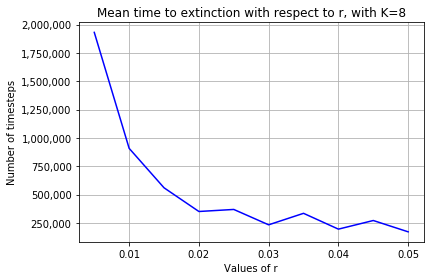

In [9]:
#plot the mean time the population reaches extinction, based on r
r = np.linspace(0.005,0.05,10)
K = 8
start = time.time()
num_trials = 50
X0 = []
final_pop = []
mean_time = []
for j in range(len(r)):
    n_time = []
    X0.append(r[j])
    for k in range(num_trials):
        x0 = np.random.randint(1,2*K+1)
        i = extinction_time(x0,K,r[j])
        n_time.append(max(i,0))
    mean_time.append(sum(n_time)/num_trials)
end = time.time()
print("Running time is %g s"%(end-start))
fig3, ax3 = plt.subplots(1, 1)
ax3.plot(X0, mean_time, 'b', label='Time to extinction wrt population')
plt.xlabel("Values of r")
plt.ylabel("Number of timesteps")
plt.title("Mean time to extinction with respect to r, with K=%g"%K)
plt.tight_layout()
ax3.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
plt.grid()
plt.show()

## Theoretical Results

**This is a joint work of Group 1 (Triet Duong) and Group 2 (Thuyen Dang).**


Given a birth-death process with transition probability:
$$\begin{align}
\label{1}
P(X_{t+1} = j+1 | X_{t} = j) 
&= b_{j}\\
P(X_{t+1} = j-1 | X_{t} = j) 
&= d_{j}\\
P(X_{t+1} = j | X_{t} = j) 
&= 1 - (b_{j}+d_{j}).
\end{align}$$

Suppose the capacity $N = 2K$ for some integer $K > 0$. Moreover, we
assume the state 0 is absorbing (i.e., extinction) and state $N$ is
reflecting (i.e., when never the population reaches $2N$, the birth
probability $b_N = 0$).

Let $\mathbf{s}^0$ be the hitting time (or first passage time) defined
by 
$$\begin{align}
\label{eq:1}
  \mathbf{s}^{W} = \inf \{ t \ge 0 \colon X_{t} \in W \},
\end{align}$$
where $W$ is a subset of state space $\left\{ 0, \ldots, N
\right\}$. If the population at time $t = 0$ is $k$, then the
expectation of mean time to extinction is denoted by
$E_k[\mathbf{s}^0]$, which admits the explicit formula:
$$\begin{align}
\label{eq:2}
E_k [\mathbf{s}^0] = \sum_{i=0}^{k-1} \left( \frac{1}{d_{i+1}} +
  \sum_{j = i+2}^N \frac{b_{i+1} \cdots b_{j-1}}{d_{i+1}\cdots d_{j}}\right).
\end{align}$$

The formula can be proved rigorously by generating function, see
Chapter 5 of the book Wolfgang Woess, Denumerable Markov Chain.


*Remark.* The birth-death process has a continuous deterministic counterpart,
which is the logistic equation 
$$\begin{align}
\label{eq:3}
\frac{dn}{dt} = rn \left( 1 - \frac{n}{K} \right).
\end{align}$$
(Notice the similarity between the right hand side with $b_i - d_i =
ri (1 - i/K)$.) In the deterministic model, the population never
extincts if it's near the capacity $2K$. However, if one add
randomness into this model, the theoretical result above shows that
the population will become extinct eventually. 

In [10]:
# Expected time to extinction
r = 0.004
K = 50
initpop = 7
ex = analytical_extinction_time(r,K,initpop)
print("The expected time to extinction is %g time steps"%ex)

The expected time to extinction is 6.46967e+30 time steps


Analytical extinction time vector with respect to different initial population is: [0.0, 604427.6835201831, 647122.8624215276, 654111.0625820382, 656101.501935318, 656924.9817197453, 657352.624045998, 657605.5813238382, 657766.6115875539, 657873.3208636137, 657945.3333190813, 657993.9491195101, 658026.1564057153, 658046.5126495901, 658058.1139345486, 658063.132453069, 658063.132453069]
Running time is 15.8775 s


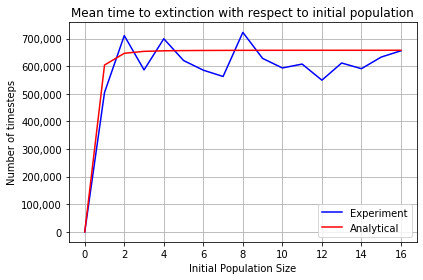

In [37]:
#plot the mean time the population reaches extinction, based on initial population
r = 0.015
K = 8
start = time.time()
num_X0 = K*2+1
num_trials = 100
X0 = []
final_pop = []
mean_time = []
mean_time_ex = []
for j in range(num_X0):
    n_time = []
    n_time_ex = []
    X0.append(j)
    for k in range(num_trials):
        i = extinction_time(j,K,r)
        ex = analytical_extinction_time(r,K,j)
        n_time.append(max(i,0))
        n_time_ex.append(max(ex,0))
    mean_time.append(sum(n_time)/num_trials)
    mean_time_ex.append(sum(n_time_ex)/num_trials)
print("Analytical extinction time vector with respect to different initial population is:",mean_time_ex)
end = time.time()
print("Running time is %g s"%(end-start))
fig3, ax3 = plt.subplots(1, 1)
ax3.plot(X0, mean_time, 'b', label='Experiment')
ax3.plot(X0, mean_time_ex, 'r', label='Analytical')
plt.xlabel("Initial Population Size")
plt.ylabel("Number of timesteps")
plt.title("Mean time to extinction with respect to initial population")
plt.tight_layout()
ax3.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
plt.grid()
plt.legend()
plt.show()

Running time is 5.10945 s


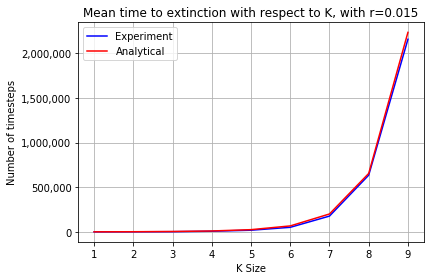

In [38]:
#plot the mean time the population reaches extinction, based on K
r = 0.015
num_K = 9
start = time.time()
num_trials = 100
X0 = []
final_pop = []
mean_time = []
mean_time_ex = []

for j in range(num_K):
    n_time = []
    n_time_ex = []
    X0.append(j+1)
    for k in range(num_trials):
        x0 = np.random.randint(1,2*j+2)
        i = extinction_time(x0,j+1,r)
        ex = analytical_extinction_time(r,j+1,x0)
        n_time.append(max(i,0))
        n_time_ex.append(max(ex,0))
    mean_time.append(sum(n_time)/num_trials)
    mean_time_ex.append(sum(n_time_ex)/num_trials)
end = time.time()
print("Running time is %g s"%(end-start))
fig3, ax3 = plt.subplots(1, 1)
ax3.plot(X0, mean_time, 'b', label='Experiment')
ax3.plot(X0, mean_time_ex, 'r', label='Analytical')
plt.xlabel("K Size")
plt.ylabel("Number of timesteps")
plt.title("Mean time to extinction with respect to K, with r=%g"%r)
plt.tight_layout()
ax3.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
plt.grid()
plt.legend()
plt.show()

Running time is 9.66004 s


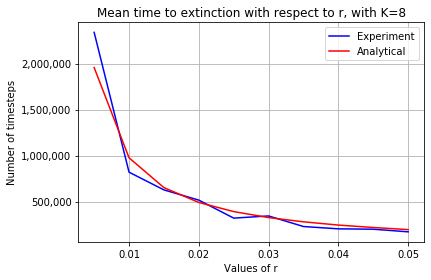

In [12]:
#plot the mean time the population reaches extinction, based on r
r = np.linspace(0.005,0.05,10)
K = 8
start = time.time()
num_trials = 100
X0 = []
final_pop = []
mean_time = []
mean_time_ex = []

for j in range(len(r)):
    n_time = []
    n_time_ex = []
    X0.append(r[j])
    for k in range(num_trials):
        x0 = np.random.randint(1,2*K+1)
        i = extinction_time(x0,K,r[j])
        ex = analytical_extinction_time(r[j],K,x0)
        n_time.append(max(i,0))
        n_time_ex.append(max(ex,0))
    mean_time.append(sum(n_time)/num_trials)
    mean_time_ex.append(sum(n_time_ex)/num_trials)
end = time.time()
print("Running time is %g s"%(end-start))
fig3, ax3 = plt.subplots(1, 1)
ax3.plot(X0, mean_time, 'b', label='Experiment')
ax3.plot(X0, mean_time_ex, 'r', label='Analytical')
plt.xlabel("Values of r")
plt.ylabel("Number of timesteps")
plt.title("Mean time to extinction with respect to r, with K=%g"%K)
plt.tight_layout()
ax3.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
plt.legend()
plt.grid()
plt.show()